In [1]:
##########################################################################
# Created on Sat Nov 21 20:05:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 15.6.4.Measure credit VaR

In [3]:
def CVaR(T,X,L,R,Lambda,rou):
    '''Define a function to calculate credit VaR of a portfolio
    T:Time of credit VaR in year
    X:Confidence level
    L:Amount of portfilo
    R:Recovery rate
    Lambda:Annualized probability of default(continuous compound)
    rou:default correlation'''
    from scipy.stats import norm
    from numpy import exp
    C=1-exp(-Lambda*T) #accumulated probabiltiy of default
    V=norm.cdf((norm.ppf(C)+pow(rou,0.5)*norm.ppf(X))/pow(1-rou,0.5))
    VaR=L*(1-R)*V
    return VaR

In [6]:
tenor=1
prob=0.999
par=2e11
recovery=0.5
PD=0.015
corr=0.2

credit_VaR=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD,rou=corr)
print('1year 99.9% Credit VaR(100M) is ',round(credit_VaR/1e8,4))
print('Proportion in the total amount of the whole credit portfolio is ',round(credit_VaR/par,6))

1year 99.9% Credit VaR(100M) is  188.231
Proportion in the total amount of the whole credit portfolio is  0.094115


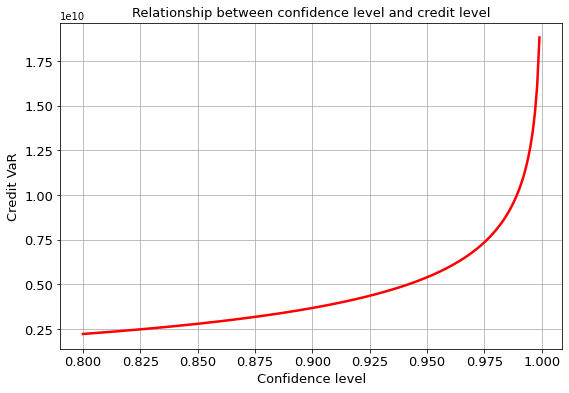

In [8]:
import matplotlib.pyplot as plt
import numpy as np

prob_list=np.linspace(0.8,0.999,200)
CVaR_list1=CVaR(T=tenor,X=prob_list,L=par,R=recovery,Lambda=PD,rou=corr)

plt.figure(figsize=(9,6))
plt.plot(prob_list,CVaR_list1,'r-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Confidence level',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Credit VaR',fontsize=13)
plt.title('Relationship between confidence level and credit VaR',fontsize=13)
plt.grid()
plt.show()

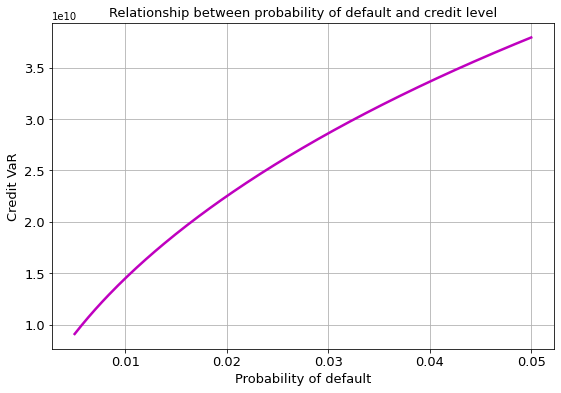

In [10]:
PD_list=np.linspace(0.005,0.05,200)
CVaR_list2=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD_list,rou=corr)

plt.figure(figsize=(9,6))
plt.plot(PD_list,CVaR_list2,'m-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Probability of default',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Credit VaR',fontsize=13)
plt.title('Relationship between probability of default and credit VaR',fontsize=13)
87plt.grid()
plt.show()

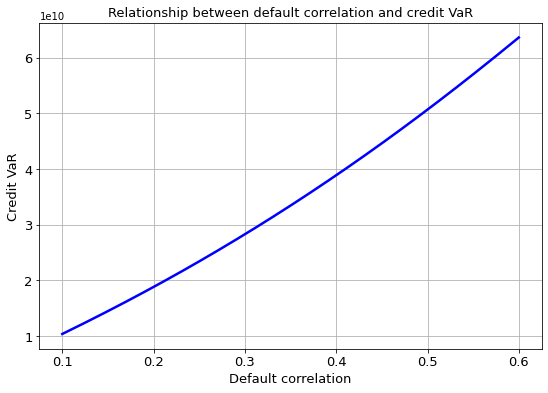

In [12]:
corr_list=np.linspace(0.1,0.6,200)
CVaR_list3=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD,rou=corr_list)

plt.figure(figsize=(9,6))
plt.plot(corr_list,CVaR_list3,'b-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlabel('Default correlation',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Credit VaR',fontsize=13)
plt.title('Relationship between default correlation and credit VaR',fontsize=13)
plt.grid()
plt.show()